In [1]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.model import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### Generates Empirical Data

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

c:\users\joewa\.virtualenvs\simulator-g4ninw5e\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator KernelDensity from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.



Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
cl = ChromatogramLoader(xcms_output, min_ms1_intensity, min_rt, max_rt)

Processing exported chromatograms
0


../codes\VMSfunctions\Common.py:49: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000
Loaded 24002 UnknownChemicals/Chromatograms


Creates a liquid chromatography column, with 3 `KnownChemical`.

In [8]:
# formula_strings = ['C8H10N4O2', 'C6H9N3O2', 'C5H9NO2']
# column = KnownColumn('LC', formula_strings, ps)

Creates a liquid chromatography column, with 10 `UnknownChemical`.

In [9]:
num_chemicals = 1000
column = UnknownColumn('LC', num_chemicals, ps, cl)

Plot some chemicals

UnknownChemical mz=212.5501 rt=443.09 max_intensity=1.00


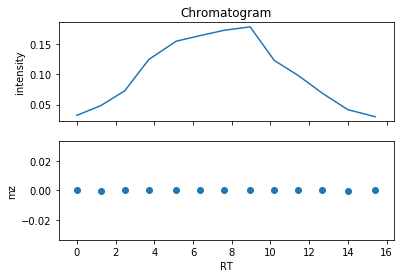

UnknownChemical mz=82.7845 rt=797.61 max_intensity=1.00


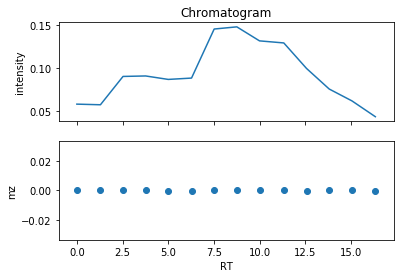

UnknownChemical mz=166.7571 rt=498.04 max_intensity=1.00


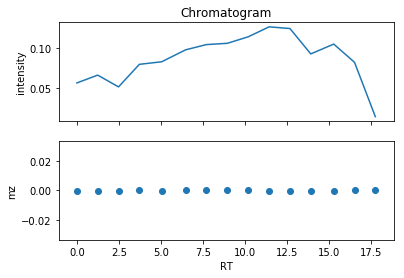

UnknownChemical mz=132.3059 rt=908.17 max_intensity=1.00


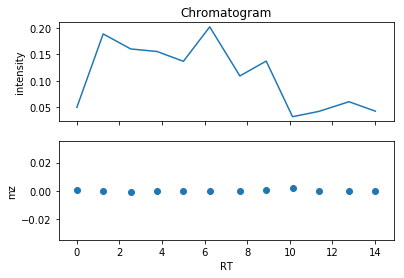

UnknownChemical mz=174.1989 rt=515.80 max_intensity=1.00


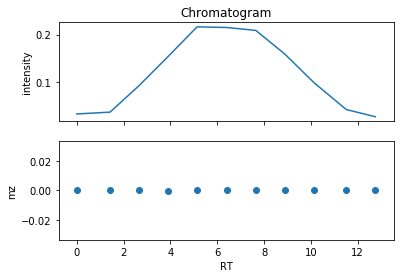

UnknownChemical mz=121.4677 rt=944.23 max_intensity=1.00


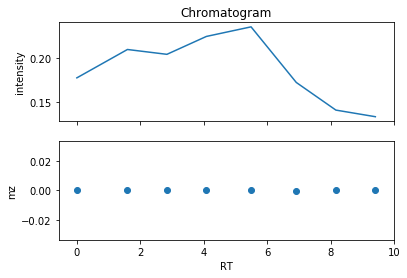

UnknownChemical mz=398.8522 rt=594.44 max_intensity=1.00


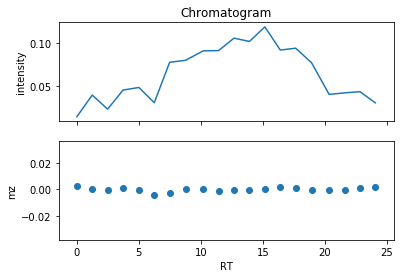

UnknownChemical mz=283.2912 rt=288.99 max_intensity=1.00


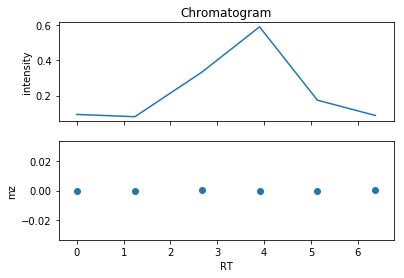

UnknownChemical mz=651.9951 rt=503.67 max_intensity=1.00


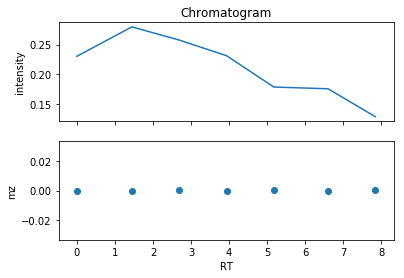

UnknownChemical mz=117.5226 rt=290.73 max_intensity=1.00


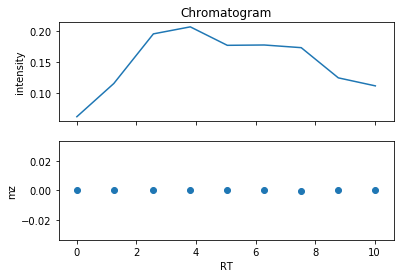

In [10]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in column.chemicals[0:10]:
    print(chem)
    plot_chromatogram(chem.chromatogram)

Connect the column to mass spec. Define the scan times, scan_levels and isolation windows.

In [22]:
def plot_scan(scan):
    plt.figure()
    for i in range(scan.num_peaks):
        x1 = scan.mzs[i]
        x2 = scan.mzs[i]
        y1 = 0
        y2 = scan.intensities[i]
        a=[[x1,y1],[x2,y2]]
        plt.plot(*zip(*a), marker='', color='r', ls='-', lw=1)
    plt.title('Scan {0} {1}s -- {2} peaks'.format(scan.scan_id, scan.rt, scan.num_peaks))
    plt.show()    
    
def scan_handler(scan):
    if scan.num_peaks > 25:
        plot_scan(scan)
        for mz, intensity in zip(scan.mzs, scan.intensities):
            print(mz, intensity)
            
def acquisition_open():
    pass
    
def acquisition_closing():
    pass

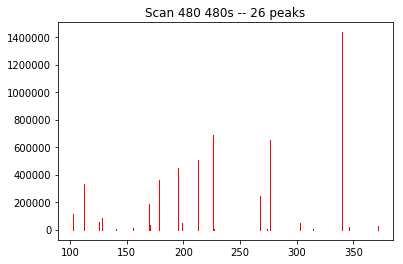

103.05017284944846 111969.24039250986
112.25173016683941 333368.59155805607
112.47644024145163 3475.9693779519935
125.33209234990926 54676.68843977444
128.33687450024433 86712.62775269912
128.45026379988298 3795.6641516174523
140.30494538787636 6282.511471821935
155.51001997510681 9929.110765529282
169.5595929501518 183108.56577237573
170.2141329993055 30562.479321737483
178.62206577548778 357320.76989305124
184.4108040757535 -1423.9414153385844
195.4914665048071 448495.79307001375
198.73837946283737 45453.116071172764
212.5597956884591 506407.9119579424
225.9378591226712 687581.9130105232
226.84350470191464 3047.5181673854527
260.4307659365136 -2836.5003403124515
267.46871416699287 243485.02343825385
273.9134350814374 1933.073474793781
276.1327142461466 649828.6652756054
302.55075156452676 45923.92745819778
314.7028569195278 3770.6733747792227
339.60397313889706 1435402.8880558687
346.2746179773547 16275.186598771865
371.5564564131253 25885.657781342717


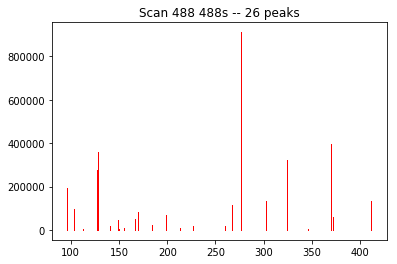

96.1659268271574 191501.16388920418
103.05007907419241 97301.10093554818
112.47648136117219 3518.786379303309
127.37838784237078 277668.36145120783
128.3366726027829 359297.23834797717
128.44992093697016 5273.322415865835
140.3046528280493 18428.18952543951
149.363364097962 44393.762119057305
150.47718751388697 3909.3417865872484
155.51018724838528 9514.44707832875
166.71386712730168 51474.64293297205
169.55897057556317 81652.5753868989
170.21376573850674 75493.76787765106
184.41028971630217 23898.58473647761
198.2730185059857 69132.77311096131
213.01423948151552 7304.00440152397
226.84355533369344 16668.364409527858
260.42987916524595 16916.291788653376
267.4688509343563 112947.32977535062
276.13277833618304 911691.2991086813
302.55011557642433 133558.79891524377
323.83363145847 324701.60261585785
346.2746254487826 2174.0593799076137
370.0919915071656 398432.37226116465
371.5555995317903 58320.46347487507
411.71263672656266 133322.2376247244


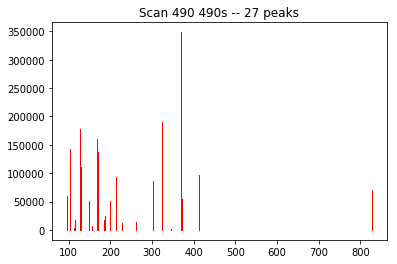

96.16593095326208 60453.50100024662
103.05041392532819 143102.4924325452
112.47641268842943 2760.2052678296345
114.03314849847207 17734.601083076537
127.37791753189599 177099.64414786876
127.41954001617002 64599.73305689044
128.33696344070293 110258.91546199135
128.4501723695434 3430.947733562701
149.3632421348389 50937.45209927681
150.47733472201614 557.2621335603767
155.51071170348243 6112.13943713173
166.71341874432616 159659.89296352994
169.55826732901852 137140.84103778997
170.21405072366315 85226.91504882433
184.4104539457401 17287.553470897055
188.1863339265557 24945.873783042403
198.27178707807406 50750.42843504515
213.01407539142892 93184.23713171088
226.84356806346955 11941.758431086459
260.4301937998806 13859.36869686272
302.55006417588766 85481.94665247845
323.8336431660774 190282.7622650214
346.2746713831157 1448.6870411886152
370.0919758249953 348521.4263235254
371.55574816206996 53743.719017069154
411.7127781482261 97658.4389710841
827.0400909981324 69971.50839974865


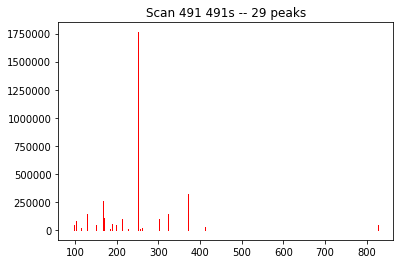

96.16579791929068 41454.09047149569
103.0498786392497 82460.08524845296
112.47651246731242 3472.514344223921
114.03317303028797 16591.893087835695
127.37771532927361 132387.24131030482
127.4194417308938 46714.6619927132
128.33728235430019 141149.2816097962
128.4501804335874 2207.0080512128475
149.3633368082296 44909.63832404798
150.47712354540468 5847.913652953117
166.71357509534522 253663.52091481342
169.55833009209442 93833.16934090617
170.21406301922235 108567.67213534315
184.41046429958516 6064.852439895591
188.18644655643908 51342.35913396388
198.27594362805365 42348.87480865205
213.01377934378306 99333.89043134036
226.84339925257453 5507.708893744581
251.55042298563652 1761888.9363563168
256.4996963475367 3744.37692765667
260.4299091056885 13223.745757518336
302.5496549363347 100479.97467606988
316.9657522118264 2053.0586608465796
323.8336649332515 140675.5122190343
346.2746713831157 1428.4353516920319
370.0920594706309 317344.3017914773
371.55530179358334 65426.85506630918
411.7

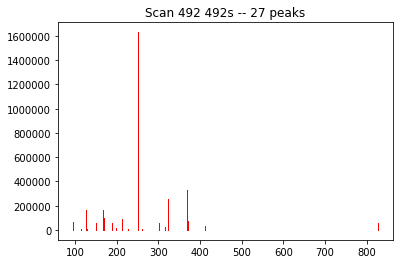

96.16568708062886 61786.43082061232
112.47640972387367 2351.904014204962
114.03308830456751 5015.165840053783
127.37759281792036 161954.6563257285
127.41968023140682 51817.76575859575
128.45010546343718 4545.016138922736
149.36328367693633 53119.347788263585
150.47709667960737 9187.672220376526
166.71360066307918 165992.65769180626
169.55850346522413 98536.54160220758
170.21426586461 58759.324583221394
188.1864682616866 59442.68394213741
198.27315682669348 13517.70708881151
213.01448086255004 94020.19373509886
226.84348497610827 7056.158827573658
251.55037056284584 1630917.1476128574
256.4997793931255 2937.9625065606533
260.43008852066754 9470.134446783328
302.5511053633832 55642.93856957135
316.96651267265014 20396.795685291105
323.8336495091547 258168.40444204508
346.27466667684644 1662.672025015154
370.0920594706309 333239.16004939674
371.5550873341441 71861.72785455715
411.7100824603425 30510.199408121196
453.3643388438158 56.526397997332964
827.0401181424047 61167.98159286804


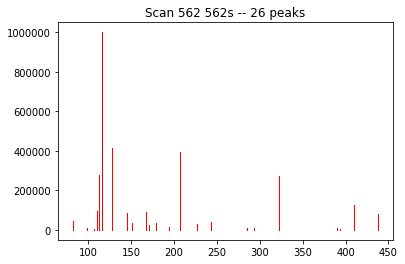

82.78776248711692 43485.43402847861
98.58002570582568 9126.81018614115
106.5907257020208 4052.5746499233337
110.06515453736478 96954.52325372327
112.47654817864351 2479.5948336795445
113.22044118496905 279753.0674244119
116.3161538520466 999967.1547761264
128.21408794347735 415599.27307607257
144.95312668324078 87768.48774596021
150.86428547257 33829.87501923925
167.96402096261255 92667.9497966017
171.15184408400478 25010.325083565098
179.36351463388644 33527.80595924504
193.79059484539314 16887.240390906423
207.35820926934895 396637.3240699851
220.05561029834334 1331.5579525788078
226.84356635534934 29862.01345917934
243.34812883816352 38146.600246325346
285.2363006454778 8092.737519464962
293.8661395102449 7710.093070616749
322.32465252695306 271440.5924970678
387.48844558296645 949.8121126725604
389.4827269022473 10573.734328976267
393.4242439833828 3166.283782805056
410.3247372589727 127779.16399892108
437.4388531237339 78620.43532779967


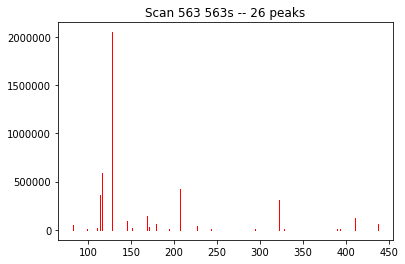

82.78792229719366 46077.003756877144
98.58005451411202 8023.427377686107
106.59073720073143 3945.256293927487
110.06510467324816 18060.432992782262
112.47632236591734 1447.3264183220765
113.22035490748601 362849.95438087336
116.31617734939066 594260.3966348796
128.21400259210967 2046245.638819944
144.95459958024009 92837.18588470298
150.86368278522463 18764.734979494377
167.96431680838054 141738.28066656235
171.15328999414126 32485.877728871383
179.36376155376644 60757.56888008362
193.79037121437955 13921.119242498156
207.35819397256628 418836.47030151164
220.0546552398663 2310.9719579016173
226.84329266460784 35801.59574884885
243.34790000356608 11829.303251274485
293.8661208211855 14152.010212534316
322.32456638862806 312611.30992261344
327.9775145834977 12316.99012652876
387.4883175519652 1714.6531456079342
389.48292529119544 10288.90767174229
393.42380821950275 7746.680531310936
410.3254525887886 127540.60470537694
437.43884080832714 56322.85238497623


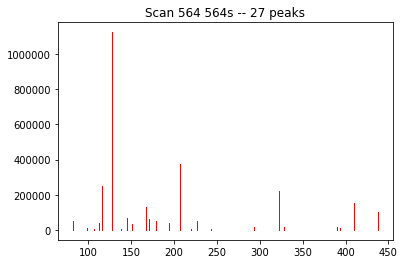

82.7880821072704 48668.57348527568
98.5799934239391 12192.342115486992
106.59077389415042 3887.387303900848
112.47644621688404 2384.0986255130683
113.22055370286645 40466.58984722217
116.3160046824127 251599.8765762322
128.2140680890398 1123748.7645993955
138.28379867921777 3979.174598218094
144.94979011816125 70017.5331310265
150.8640876031044 31373.998203961684
167.96428956793335 132795.27178867173
171.1544766884626 64627.38508195892
179.36326864015476 49313.853719851235
193.79056895757404 38149.06709650133
207.35809739795164 375711.4502246071
220.054288147908 2545.474634902869
226.84330415736184 52690.770925452016
243.34813438985753 7706.699412586209
276.46028587949746 0.0
293.8661015697228 17273.12586466821
322.3248337294645 222939.48414071443
327.9777062015598 15307.013673907171
387.48854602417606 767.9227907661746
389.48290129660563 14193.70913503368
393.4241285579715 10274.16519455545
410.3255178437673 150574.29277222214
437.4389508172951 103351.21075076514


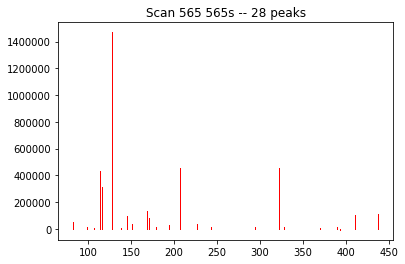

82.78824191734714 51260.143213674215
98.57991324821877 10712.995783870281
106.59056018148445 4998.692435712196
112.47655977094888 2065.6829971723882
113.22058277411206 429147.56423751626
116.3155609696453 309577.85341913666
128.21409202439511 1470263.580220434
138.28365736213203 6046.566395508118
144.95186223696197 96206.60654013352
150.86408198499356 38435.498651305876
167.96421567549186 136233.65201560865
171.15486982956568 77748.56768748767
179.3634913330958 16101.888939418996
193.79067594460108 32196.702244617798
207.35840096847528 452921.9355193845
220.05507257943367 2229.615753857803
226.8432467992686 38305.824475484034
243.3483041415281 10778.535805616102
276.4598879031962 0.0
293.8661015697228 16378.0337150654
322.3598623226193 457124.9621384986
327.97803434756116 13505.62167667206
370.65312107324 3323.9492024645756
387.48868094915997 304.15696979266386
389.48288744773595 12270.73312778221
393.4228674290884 -7741.019748412616
410.325276728526 103953.66644896545
437.438703669099

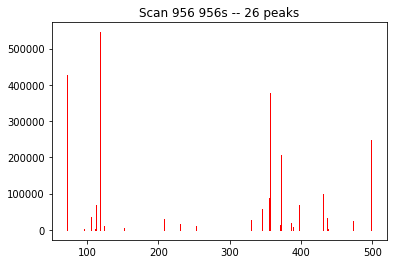

72.28890476274499 426787.97372810397
95.6972055389538 1323.1071537151352
106.37841634090009 36498.457829952094
110.77784229620791 2705.274257613651
113.4809101355194 69280.38391580852
118.80502608294924 545060.5518941866
124.49753064237595 9476.75460713994
152.03455095886116 5746.246186223608
207.75625082511445 30027.668142298367
230.82565392630025 16317.772217380474
249.08038729188286 892.9270032739122
252.42757502215684 9939.393707811907
330.23927961996105 26556.452323339417
344.6997833481994 58109.77339592837
355.31663559224233 87626.54579968422
356.30414420716266 376930.4652194032
370.8961565493717 12454.180245848578
371.6889735970254 207317.68306529112
385.72799893991345 18390.913353044132
388.92539641588917 7406.061139453233
396.9382762723032 69933.6667874923
430.61771976437086 98406.09082130886
436.4914708078239 31929.14383225964
437.9258267500991 3814.3597053243698
472.69761637840685 23754.397753598892
498.5454069712719 248631.12813939995


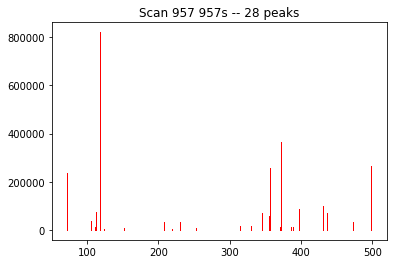

72.29041091481524 237751.02042647463
95.6972297592538 202.96142437880684
106.37817915065511 37612.57605136815
110.77776154644684 10248.258493650557
113.4809101355194 73408.70914416909
118.80534137943357 820091.4975478523
124.49735919530774 4293.272234079668
152.03453848246772 9231.551166422156
207.75613277133064 34606.62230584893
219.11699224204708 5741.602916871306
230.82578305623076 32186.84937688884
249.0803258140859 1021.3792395180513
252.4277808707074 8740.004972513418
314.7733296061249 17810.91976815762
330.2381578795659 15259.350272753574
344.69960494580874 69180.57322027234
355.3168198115664 59627.56104709992
356.3043629701427 256412.82124228403
370.89621535477886 10302.089261299267
371.68893695168845 366048.5807909561
385.7281396952896 13934.542546369868
388.92530851530825 11277.986048650311
396.9382762723032 84995.60402505343
430.61764848768104 99837.90750330448
436.49152566114253 69022.51270624464
437.92617047181596 1239.9087060278696
472.6984544384076 32563.16631543447
498.

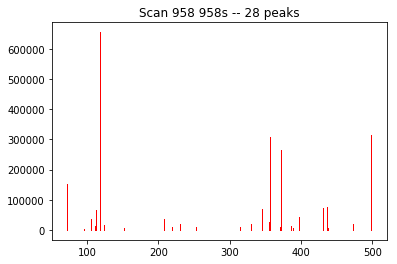

72.29168762028652 152805.12625227505
95.69720271899897 2521.123211769338
106.37811463146201 36675.74135910795
110.77778498544681 13996.610464105743
113.48088280603906 65992.81939794094
118.80556305675638 655405.3848931724
124.49773105872555 17649.624343363877
152.0345753988927 7745.892136844
207.7561509925162 35589.08876623091
219.11696272597902 9854.213162063963
230.82569446445552 19700.055112333273
249.0805578759256 469.7512998816053
252.4277261953253 8942.240258868856
314.7734368358445 10936.367108568076
330.23892861588786 19787.53088279835
344.6995926700332 70259.04160593123
355.31678341046796 27390.107212922834
356.30446117634784 307090.4967619849
370.89618571917066 10116.60582384093
371.68893695168845 264796.1971827498
385.7279333138806 14168.827124777941
388.925560747414 7009.902807107466
396.9382762723032 41411.93287315509
430.6178292544895 72223.02097636118
436.49150488675315 75111.00498606046
437.9254857619334 6408.643429048567
472.6983394871394 18918.178466635458
498.5456351

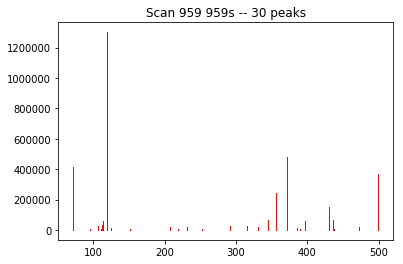

72.28827578609173 416596.95990668685
95.69713511963045 3241.8108692419314
106.37799799470403 26795.209586109195
110.77791376634569 4247.2245466012155
112.54048052501716 29337.23251363167
113.48096185875458 61487.820080405836
118.80495371752465 1300493.8860403893
124.49780343512067 13413.837820570105
152.0344840911337 9103.823555261559
207.75616389539027 17792.801002882232
219.11696272597902 7597.395472293241
230.82569446445552 19407.74130391151
249.08026449168008 1302.6055956100226
252.42771372646456 8918.820492577124
291.05209581336356 24878.04852850841
314.77314913238723 22935.27717735265
330.23949665809903 20372.86896806267
344.69951667556427 63462.249311856256
355.31673406919396 41120.667005519215
356.3041934373325 245009.7446988431
370.89622308953005 11211.8002016298
371.68894634740263 481700.62752706546
385.7278371197813 12923.082148143652
388.92553395095655 7805.641182086244
396.93823486294536 56238.032620400125
430.617817282538 148650.05952375842
436.49157640349716 62934.997018

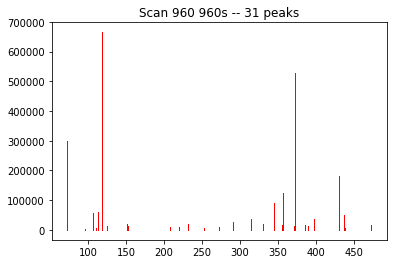

72.28939594710727 299031.52039193304
95.69710621096364 2950.3206197162044
106.37886212065335 55769.152879622634
110.77727172018663 4952.658002216719
112.54017914947785 37665.58437687113
113.48093797179395 58724.20143966386
118.80531151120275 665241.8205277844
124.4977323399404 14301.237970755657
151.35610986406598 21532.827492886387
152.0344598062706 11610.692630223733
207.75612697896528 8971.952014396587
219.1169781758818 9240.599025178357
230.82569446445552 21388.108495272765
249.08047741613473 701.0604464875912
252.42776002847822 8078.883072081151
271.6977373201302 9610.77564966764
291.0521204441779 27191.85017183119
314.77325077084305 38109.470981537335
330.23740106588787 21474.32665198207
344.6997864370979 90024.3761619962
355.31684447001027 15245.380278644348
356.30429266803304 125304.417318323
370.8962110652676 11764.027777063688
371.6889216928995 527225.6683130038
385.72814441432257 17877.30414320588
388.9255986525361 11653.844745685406
396.9384668440138 37604.229909625275
430.

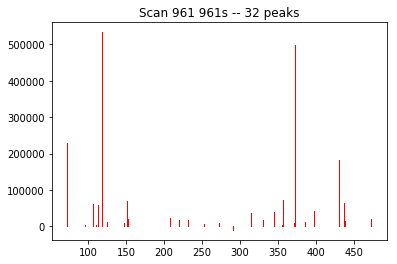

72.28902256093987 227740.06121553885
95.69714068474654 2977.9321444930233
106.37840964429462 60639.33604643162
110.77789081393882 3314.957033391242
112.54023970516288 36153.30528197616
113.48092630605312 57418.04545200227
118.80493847379925 533407.2042042842
124.49790392471627 11625.336497561351
146.96677717241712 9225.952117355766
151.35611194920526 70381.9761927085
152.0345093406023 21287.769355307835
207.7562491336027 22557.900441282167
219.11692525510475 16172.384263872875
230.82568746924886 17935.34474295701
249.08054498726193 764.8121860267844
252.4277414541143 6089.260292697368
271.6977864627687 9220.318221951995
291.0520837888906 -9727.686076627819
314.77311107068994 36066.84819837655
330.23893025535824 16674.781391049284
344.6996748181137 38696.73783571474
355.31680077537413 3170.583649140901
356.30440121551834 73546.53939383318
370.89624794942097 10139.201736214407
371.6889147430969 497326.9682598802
385.72794273273774 12662.036551368086
388.92550818384575 1300.9773384764082


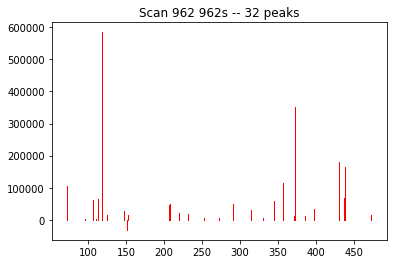

72.28808433646655 104649.95245401168
95.69707612005331 2966.5300517651954
106.37844310505417 60853.12871574314
110.77774270793621 3850.7013972331715
112.54023970516288 33221.72290203774
113.48095591188641 64058.92093649617
118.80503668000442 584470.247749867
124.49746573219824 15338.563459359852
146.96711145819359 28133.342048862443
151.35618590133285 -31479.048423078933
152.03459740290322 16216.480640095711
206.15053548538677 46729.518978577085
207.7561445196325 48498.9565633716
219.11697222340274 21701.58911435744
230.82571337326752 19290.334771309695
249.08040076244413 325.65929553992686
252.4277414541143 6024.532286021106
271.69773665469637 6527.910659600002
291.05215277132805 49524.73128104116
314.77311107068994 30406.716514138676
330.2379323442909 6184.7385079327005
344.69985594989026 57178.37828614496
356.30452397327457 113531.92029021388
370.89622349158856 11451.300456975438
371.68895273248575 353067.8106553326
385.7279502356665 13225.630020203856
396.93795281182577 34139.14088

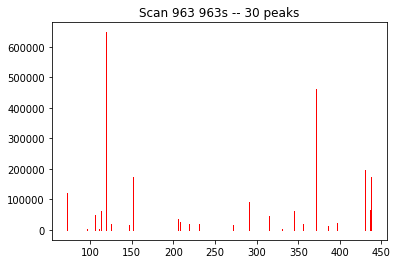

72.28676658793549 119619.31181767459
95.69732087121795 2741.0068631040626
106.37873796088111 48785.38566952696
110.77783620541784 4524.963988998372
112.54024944454524 40089.55973429527
113.48094002813393 60428.92207076499
118.80464861834784 648434.1661980419
124.49752450856542 17851.844660400893
146.967414369348 14606.830287391656
151.35595992183588 172598.20791340605
152.03463425988147 15485.244275112798
206.15034546310721 35052.60520686612
207.75621739519931 27457.566243988742
219.11697756986038 19358.591219711743
230.82569446445552 20908.028103164026
249.0803480803676 1212.9137784691
271.69754154271084 16380.115279000098
291.0517866944809 92374.59305388003
314.77306386653095 45835.663680024
330.23712214310103 2860.817645561278
344.7000400865242 60602.01881898055
356.304271637978 19105.572234640575
370.89622349158856 12201.881483395391
371.6889650478925 463473.7252953814
385.7280224381381 13988.764453628904
396.9387999829575 24155.67314507056
430.61766067414806 197499.36101372764
436

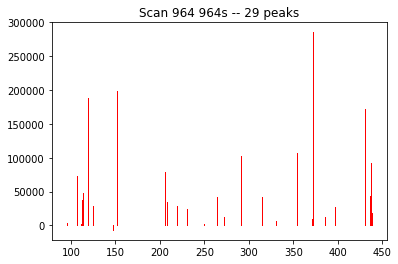

95.69708201811444 3686.0350503905797
106.37810777734069 72939.17193469276
110.77747653728639 2063.295336372535
112.5401430669669 38148.24014705135
113.48100071763461 48272.98346507625
118.80454170920846 188683.87293958556
124.4976671161556 28781.402860761318
146.96797950968298 -6716.85146946891
151.3561505932688 198690.31399153313
152.03458978490875 19406.251728574418
206.15109846859247 78180.06843048832
207.75630044398588 33811.942911692975
219.11697402183754 28074.840896316342
230.82569446445552 24393.72840595612
249.0802676015223 1360.3802286610994
264.6824615521632 41214.20811032624
271.6976641971213 12932.945019036377
291.0518545489434 102495.17699470928
314.77319299822676 41724.03471128606
330.2396060252491 6908.121960432462
353.82217374906975 106858.69338079354
370.8962115024357 10095.967111294516
371.68894686171814 285246.5412742606
385.72781084782196 12182.916574140998
396.9390814201251 26871.93943071334
430.6178247384694 172009.72832345468
436.4917203645217 43797.04348757965


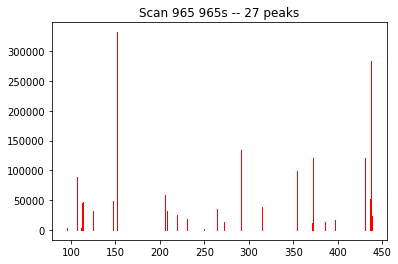

95.6970069033021 2744.098329581315
106.37771857197737 88714.0552104029
110.77779273259503 3711.9667998567134
112.54047640577348 45198.68954981262
113.48093518753599 47286.76503326332
124.49764668707314 32077.461495057698
146.96651543143062 48951.77581177776
151.356018311332 331933.66639935924
152.0344840911337 17220.078516200087
206.15061846920275 58761.20215433279
207.75638658231168 32178.332514174952
219.11692257737258 24533.44693416248
230.8256678005079 17969.63188103787
249.08048804829147 976.4960146490185
264.68247308890943 35464.820564670976
271.697723996425 13925.071528262471
291.0518914059225 133835.74366456395
314.7731828269572 38972.94402570057
353.82215480581834 99080.50479805088
370.89628248486133 10799.50656172811
371.68891489858055 120308.5806328764
385.72793547677105 12692.594482517341
396.9385239388855 15816.374481140372
430.6174662669354 119940.39160417995
436.4916244754342 51158.056688791134
437.7239199555594 284180.1327903982
437.9251076746831 23960.271394042968


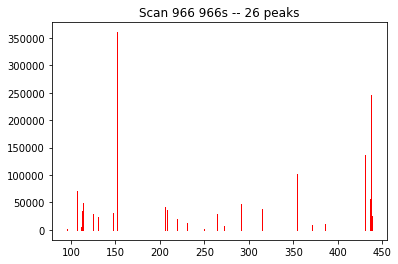

95.6969084595021 1840.1364900910505
106.37840964429462 71229.43022341013
110.77775680832904 4557.473278700322
112.54012166063355 34281.30362115949
113.48089309432494 49064.50174476345
124.49784278396069 28835.51938261166
130.61031389329685 24373.643406388284
146.96690537013916 31162.9233999639
151.3560327226771 360108.14966026397
152.03447385227562 9435.059764087797
206.1504714937685 42489.69287639797
207.75621335078722 36953.36152910153
219.11700915473014 20159.975506307685
230.82573457621257 12034.216699354245
249.08048428254887 1004.75025197045
264.68248462565566 29715.43301901572
271.6975908259262 7875.209687881743
291.0518782185945 48030.01696218839
314.7732320488572 37544.82198909361
353.82206145490596 100983.3885171098
370.8961404416473 8217.936076517071
385.7278459195003 10469.041182525409
430.61735551765963 137145.54797586508
436.49166130276086 55957.14143792202
437.7239936102134 245479.8036727535
437.9250101744331 25587.451842082635


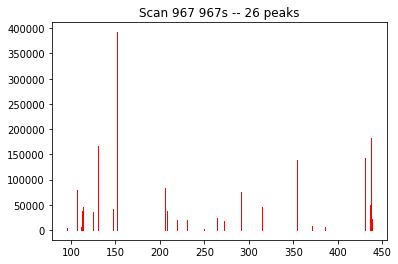

95.69715482464828 4186.951795771402
106.37841508451912 78193.45714700302
110.77780513386821 6125.149573365509
112.5399614310229 36758.379816435954
113.48104275555337 44816.353970779855
124.49715515427488 36047.71122713357
130.61041414903718 166691.97716513998
146.96680629160963 42007.24633956768
151.35622961027792 392089.79821294855
152.03450383639571 7236.444881661636
206.1510328754054 82562.61043909843
207.7561413649482 37169.105123388035
219.116944434818 19625.82738775393
230.82575761312094 19573.10571764977
249.0804805168063 1033.0044892918813
264.68249616240195 23966.045473360453
271.69743386682933 17455.290597763786
291.0516953695057 76009.32593276468
314.7730348498769 45282.245887533914
353.8225953113632 138833.0767702506
370.8962215245557 7372.051154242946
385.72777377392583 5834.67420924131
430.617498458306 142656.1255965072
436.491525185164 50100.00284254943
437.72383891551397 181490.157784606
437.925217101311 22596.64287234092


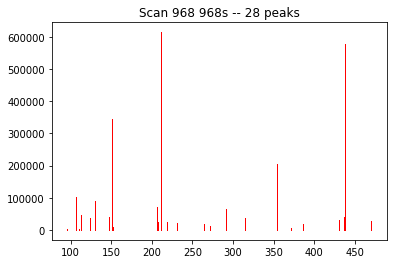

95.69712860828207 3790.6363849112417
106.37863729989377 103560.9106664377
110.77778752799128 1887.4965161948971
112.54029023390738 30575.86558569457
113.48090525008526 46284.77602529359
124.49771986711627 37099.482201676794
130.6102484786747 89827.75657867423
146.96689215296254 38916.23016176592
151.35563051467378 345391.5757149689
152.0344424080986 8637.278045729588
206.1510328754054 72693.6588118519
207.756137984456 23356.15146974932
211.4110693760502 614144.8294237454
219.11692833904868 23583.29092203883
230.82576813642436 21770.17235497425
249.08047675106369 1061.2587266133125
264.6825076991482 18216.657927705193
271.69761582087904 11063.381751937142
291.05158860285127 66219.87142790976
314.7732331410019 38376.37273972005
353.8221372333846 204521.46777199706
370.8962110302029 7451.035606611251
385.7280006859877 17801.95816439628
430.61776586127377 31609.910542768823
436.491582347774 38886.84076181441
437.7236777732164 576551.105783641
437.92532417286264 22995.163824508334
470.32506

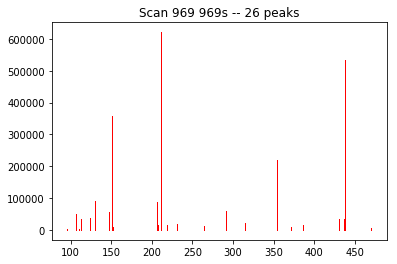

95.69712367421029 3586.2983084794387
106.37813498609155 48813.22281196833
110.77750430837634 3905.4566560927005
112.54050204285171 33394.31603606807
124.49771986711627 37599.517680471574
130.6103747029418 89366.43953336807
146.9665154657159 54569.54315419808
151.35611940726218 359136.8969332131
152.03460230538315 7299.951054401045
206.15095440237957 87895.80401133034
207.756113373506 14726.848029817382
211.41052481953542 621077.2226532724
219.116970355374 16292.006055892296
230.82568594261832 17947.80495242538
249.08058307530018 -373.47090142295303
264.6825192358944 12467.270382049925
291.05209471972074 57971.72712960035
314.77322259538545 21173.072630347047
353.8222011222437 218183.50630899437
370.89620344638837 8027.008583738728
385.72783831986453 14933.861566248264
430.6178192483616 33349.66688338277
436.4917294836127 34990.99628590795
437.7240210005252 532303.4927672389
437.9251135193574 16688.45374829194
470.32549251131354 4240.864460265493


In [ ]:
mass_spec = IndependentMassSpectrometer(column)
mass_spec.register(MassSpectrometer.MS_SCAN_ARRIVED, scan_handler)
mass_spec.register(MassSpectrometer.ACQUISITION_STREAM_OPENING, acquisition_open)
mass_spec.register(MassSpectrometer.ACQUISITION_STREAM_CLOSING, acquisition_closing)

while True:
    scan_parameters = {
        'isolation_windows': [[(0, 1e3)]],
        'ms_level': 1
    }    
    scan = mass_spec.get_next_scan(scan_parameters)
    if scan is None:
        break

### Generates Synthetic data

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

In [ ]:
# chrom = FunctionalChromatogram("normal", [0,1])
# formula = Formula("hg",100)
# isotopes = Isotopes(formula,[0.8,0.2],["Mono","1C13"])
# aducts = Aducts(formula,["M+H","M+ACN"],[0.9,0.1])
# chem = KnownChemical(formula,isotopes,aducts,100, 10000, chrom, None)
# print(chem.formula)
# print(chem.isotopes)
# print(chem.aducts)